# Modules EXPERT

Esta tabla contiene la información a nivel de fichero (módulo) de la clase EXPERT.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [72]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-09 20:13:09.890804 Data cache files found ...
2024-05-09 20:13:09.902806 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [73]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 EXPERT CLASS Features shape: (11102, 13)
As we can see the downloaded data contains a total of 11102 instances of EXPERT. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [74]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11102 entries, 191 to 18225
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              11102 non-null  object 
 1   module__has_doc_string               11102 non-null  bool   
 2   module__global_stmts_pct             11102 non-null  float64
 3   module__global_expressions           11102 non-null  float64
 4   module__number_of_classes            11102 non-null  int64  
 5   module__number_of_functions          11102 non-null  int64  
 6   module__class_defs_pct               11102 non-null  float64
 7   module__function_defs_pct            11102 non-null  float64
 8   module__enum_defs_pct                11102 non-null  float64
 9   module__average_stmts_function_body  11102 non-null  float64
 10  module__average_stmts_method_body    11102 non-null  float64
 11  module__type_annotations_pct   

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [75]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [28.77%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [76]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions             0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [77]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions
--------------------------
0 instancias no tienen un valor para la columna module__global_expressions


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__function_defs_

### 2.4 - Describimos los valores de las variables de la tabla.

In [78]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,11102,6,SnakeCase,7204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,11102,2,False,7946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,11102.0,NaN,NaN,NaN,0.166453,0.213175,0.0,0.0,0.095238,0.25,1.0
module__global_expressions,11102.0,NaN,NaN,NaN,0.081048,0.16914,0.0,0.0,0.0,0.090909,1.0
module__number_of_classes,11102.0,NaN,NaN,NaN,1.091785,3.024708,0.0,0.0,1.0,1.0,113.0
module__number_of_functions,11102.0,NaN,NaN,NaN,2.234282,6.059873,0.0,0.0,0.0,2.0,258.0
module__class_defs_pct,11102.0,NaN,NaN,NaN,0.394912,0.451161,0.0,0.0,0.022543,1.0,1.0
module__function_defs_pct,11102.0,NaN,NaN,NaN,0.400872,0.45385,0.0,0.0,0.0,1.0,1.0
module__enum_defs_pct,11102.0,NaN,NaN,NaN,0.006144,0.057754,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,11102.0,NaN,NaN,NaN,2.52465,4.069847,0.0,0.0,0.0,4.0,53.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [79]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "module__number_of_classes": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 238
    "module__type_annotations_pct": [(0, 0), (0, 1.0)], # min: 0 max: 1297
    "module__average_stmts_function_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__average_stmts_method_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__global_expressions_pct": [(0,0), (0, inf)], # min: 0 max: 26
    "module__global_stmts_pct": [(0, 0), (0, inf)]
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__name_convention_SnakeCase', 'module__expertise_level_EXPERT'], 10))
print(get_statistics(X_copy, ['module__name_convention_CamelUp', 'module__expertise_level_BEGINNER'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   5546   49.954963
             [1.0_1.0]   3529   31.787065
             [0.0_1.0)   2027   18.257972

module__function_defs_pct  count  percentage
                [0.0_0.0]   5826   52.477031
                [1.0_1.0]   3309   29.805440
                [0.0_1.0)   1967   17.717528

module__enum_defs_pct  count  percentage
            [0.0_0.0]  10913   98.297604
            [0.0_inf]    189    1.702396

module__number_of_classes  count  percentage
                  unknown   5546   49.954963
                    [1_1]   3525   31.751036
                    [2_2]    946    8.520987
                  [4_inf]    695    6.260133
                    [3_3]    390    3.512881

module__number_of_functions  count  percentage
                      [0_0]   5826   52.477031
                    [0_inf]   5276   47.522969

module__type_annotations_pct  count  percentage
                       [0_0]   6515   58.6

KeyError: 'module__name_convention_SnakeCase'

In [ ]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

In [ ]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable has_doc_string (1/14)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

In [ ]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

Siempre toma el valor false. Habría que analizar si es un fallo de toma de datos o es realidad que ningún fichero tiene doc_string.

In [80]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 3156 valores verdaderos y 7946 valores falsos. Y, la desviación típica es de 0.4510878346495869
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.2842731039452351.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.7157268960547649.


In [81]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de False en un 71.57% de los items.
La variable module__has_doc_string toma el valor de True en un 28.43% de los items.


In [82]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3156,3156,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156
unique,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1615,3156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2639
mean,NaN,NaN,0.120110,0.181438,1.486375,2.367554,0.478904,0.349508,0.007773,2.388389,2.510170,0.227646,NaN
std,NaN,NaN,0.159780,0.222233,4.461436,7.162892,0.455432,0.431911,0.065325,3.970588,2.747744,0.281292,NaN
min,NaN,NaN,0.000000,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.076923,0.100000,1.000000,0.000000,0.444444,0.000000,0.000000,0.000000,2.200000,0.000000,NaN
75%,NaN,NaN,0.166667,0.200000,1.000000,2.000000,1.000000,0.875000,0.000000,4.000000,4.333334,0.500000,NaN


### Variable has_entry_point (2/14)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

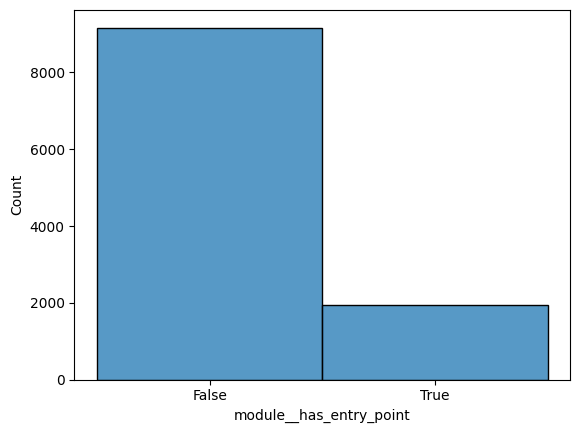

In [83]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [84]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 1934 valores verdaderos y 9168 valores falsos. Y, la desviación típica es de 0.3793009010205534
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.17420284633399388.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.8257971536660061.


In [85]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de False en un 82.58% de los items.
La variable module__has_entry_point toma el valor de True en un 17.42% de los items.


In [86]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,1934,1934,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,1635,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934
mean,NaN,NaN,0.161349,0.046256,0.916753,4.213547,0.272539,0.657208,0.000966,5.197728,1.985620,0.094478,NaN
std,NaN,NaN,0.121993,0.096595,2.326171,6.579169,0.397580,0.429638,0.018660,5.594219,4.284205,0.208894,NaN
min,NaN,NaN,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.125000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.200000,0.062500,1.000000,5.000000,0.500000,1.000000,0.000000,7.442709,3.000000,0.020957,NaN


### Variable number_of_classes (3/14)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1,047899.

<Axes: ylabel='module__number_of_classes'>

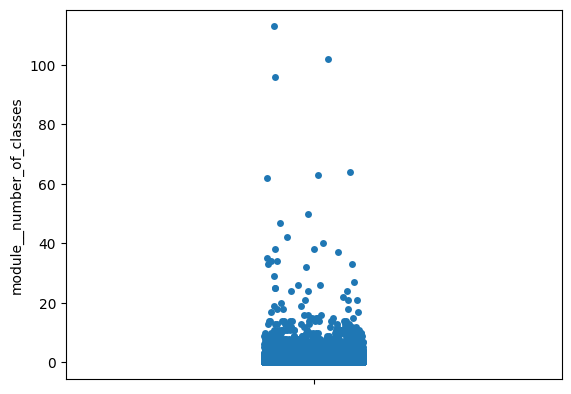

In [87]:
sns.stripplot(X['module__number_of_classes'])

In [88]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9680780152349465
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.05065041042232531,73.08004005831745]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1085 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 9.773% del total de instancias.
+3.0IQR: 468 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 4.215% del total de instancias.
L: 0 instancias tiene

In [89]:
X[X['module__number_of_classes'] > 76.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3
unique,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Lower,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,0.020280,0.144219,103.666667,3.000000,0.971435,0.028565,0.0,3.041667,2.380624,0.129630,NaN
std,NaN,NaN,0.018173,0.235638,8.621678,4.358899,0.042108,0.042108,0.0,4.430599,0.982732,0.224525,NaN
min,NaN,NaN,0.000000,0.007576,96.000000,0.000000,0.923077,0.000000,0.0,0.000000,1.793389,0.000000,NaN
25%,NaN,NaN,0.012876,0.008174,99.000000,0.500000,0.957152,0.004386,0.0,0.500000,1.813361,0.000000,NaN
50%,NaN,NaN,0.025751,0.008772,102.000000,1.000000,0.991228,0.008772,0.0,1.000000,1.833333,0.000000,NaN
75%,NaN,NaN,0.030419,0.212540,107.500000,4.500000,0.995614,0.042848,0.0,4.562500,2.674242,0.194444,NaN


Hay que revisar los tres casos con un número de clases mayor que 80. Son tres clases de expertos con miles de lineas. 

### Variable number_of_functions (4/14)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.523044.

<Axes: ylabel='module__number_of_functions'>

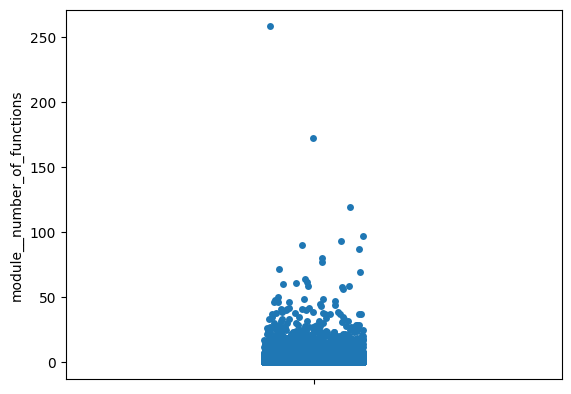

In [90]:
sns.stripplot(X['module__number_of_functions'])

In [91]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9629406494726603
Rango valores atípicos extremos (Tukey): [-6.0,8.0]
Rango valores atípicos leves (Tukey): [-3.0,5.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10313876293317265,143.22789843948286]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -6.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -3.0 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 1277 instancias tienen un valor para module__number_of_functions superior a 5.0 (Q3+1.5*IQR) para module__number_of_functions. Representando un 11.5% del total de instancias.
+3.0IQR: 744 instancias tienen un valor para module__number_of_functions superior a 8.0 (Q3-3*IQR) para module__number_of_functions. Representando un 6.701% del total de instancias.
L: 0 

In [92]:
X[X['module__number_of_functions'] > 185.9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,1,1,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.0,1.000000,1.0,1.0,1
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,NaN
25%,NaN,NaN,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,NaN
50%,NaN,NaN,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,NaN
75%,NaN,NaN,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,NaN


Este fichero es un modelo de expertos.

### Variable average_stmts_function_body (5/14)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.732112.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

Habría que analizar porque la media es tan solo de 2.73

<Axes: ylabel='module__average_stmts_function_body'>

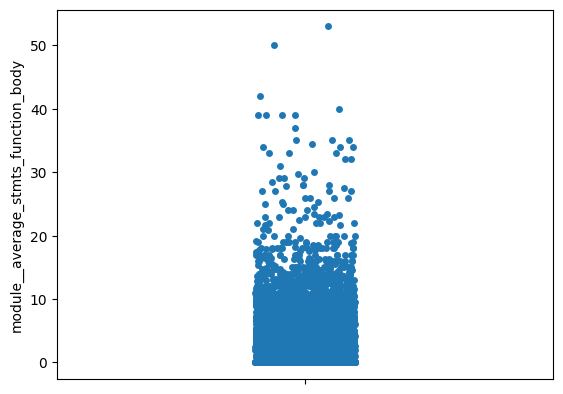

In [93]:
sns.stripplot(X['module__average_stmts_function_body'])

In [94]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4610479420522506
Rango valores atípicos extremos (Tukey): [-12.0,16.0]
Rango valores atípicos leves (Tukey): [-6.0,10.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.1949348583362973,41.93792371178648]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -12.0 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.0 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 529 instancias tienen un valor para module__average_stmts_function_body superior a 10.0 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 4.765% del total de instancias.
+3.0IQR: 150 instancias tienen un valor para module__average_stmts_function_body superior a 16.0 (Q3-3*IQR) para module__average_stmts_f

In [95]:
X[X['module__average_stmts_function_body'] > 17.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,118,118,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,93,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
mean,NaN,NaN,0.095128,0.046763,0.305085,2.601695,0.070422,0.929578,0.0,24.603102,0.787917,0.178213,NaN
std,NaN,NaN,0.099469,0.115056,0.910607,4.332623,0.188132,0.188132,0.0,7.198538,2.652181,0.320733,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.0,17.666666,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.083333,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,22.375000,0.000000,0.000000,NaN
75%,NaN,NaN,0.142857,0.055556,0.000000,2.000000,0.000000,1.000000,0.0,28.000000,0.000000,0.200000,NaN


In [96]:
X[X['module__average_stmts_function_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5826,5826,5826.000000,5826.000000,5826.000000,5826.0,5826.000000,5826.0,5826.000000,5826.0,5826.000000,5826.000000,5826
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3655,4052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5317
mean,NaN,NaN,0.205827,0.110580,1.128905,0.0,0.614173,0.0,0.008381,0.0,2.524266,0.166888,NaN
std,NaN,NaN,0.252768,0.208825,2.666666,0.0,0.483763,0.0,0.073030,0.0,3.093187,0.250047,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN
50%,NaN,NaN,0.111111,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,2.000000,0.000000,NaN
75%,NaN,NaN,0.333333,0.142857,1.000000,0.0,1.000000,0.0,0.000000,0.0,4.000000,0.384615,NaN


8602 ficheros con una media de 0 sentencias por funcion es muy raro. Vamos a realizar esta medición condicionado a tener al menos una función.

In [97]:
X[X['module__number_of_functions'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5276,5276,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3549,3894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3851
mean,NaN,NaN,0.122974,0.048438,1.050796,4.701478,0.152793,0.843533,0.003674,5.312483,1.476458,0.225715,NaN
std,NaN,NaN,0.146553,0.100116,3.376034,8.104213,0.241240,0.244959,0.033443,4.477090,2.978567,0.294615,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.714286,0.000000,2.400000,0.000000,0.000000,NaN
50%,NaN,NaN,0.083333,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.173913,0.058824,1.000000,5.000000,0.267308,1.000000,0.000000,6.600000,2.500000,0.500000,NaN


Vamos a describir esta variable condicionada a tener al menos una función para ver la media real.

In [98]:
X[X['module__number_of_functions'] > 0]['module__average_stmts_function_body'].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

count    5276.000000
mean        5.312483
std         4.477090
min         1.000000
25%         2.400000
50%         4.000000
75%         6.600000
max        53.000000
Name: module__average_stmts_function_body, dtype: float64

### Variable average_stmts_method_body (6/14)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 1.66441.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

<Axes: ylabel='module__average_stmts_method_body'>

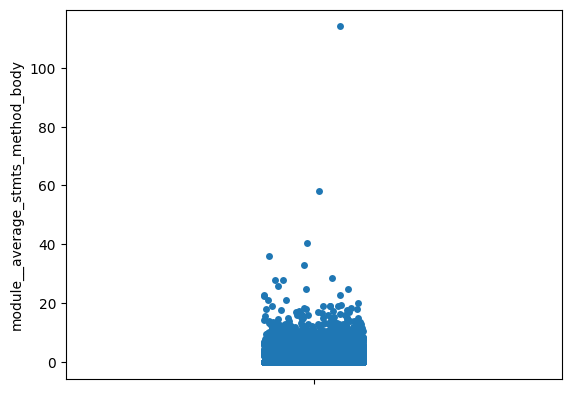

In [99]:
sns.stripplot(X['module__average_stmts_method_body'])

In [100]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5964910729912241
Rango valores atípicos extremos (Tukey): [-10.241379,13.655172]
Rango valores atípicos leves (Tukey): [-5.1206895,8.5344825]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.6348099237877991,59.07332734039142]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -10.241379 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -5.1206895 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 309 instancias tienen un valor para module__average_stmts_method_body superior a 8.5344825 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 2.783% del total de instancias.
+3.0IQR: 66 instancias tienen un valor para module__average_stmts_method_body superior a 13.655172 (Q3-3*IQR) p

In [101]:
X[X['module__average_stmts_method_body'] > 37.3].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3,3,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3
unique,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,0.175926,0.0,1.333333,1.000000,0.750000,0.250000,0.0,1.888889,70.862319,0.075758,NaN
std,NaN,NaN,0.236247,0.0,0.577350,1.732051,0.433013,0.433013,0.0,3.271651,38.379290,0.131216,NaN
min,NaN,NaN,0.000000,0.0,1.000000,0.000000,0.250000,0.000000,0.0,0.000000,40.500000,0.000000,NaN
25%,NaN,NaN,0.041667,0.0,1.000000,0.000000,0.625000,0.000000,0.0,0.000000,49.293478,0.000000,NaN
50%,NaN,NaN,0.083333,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,58.086956,0.000000,NaN
75%,NaN,NaN,0.263889,0.0,1.500000,1.500000,1.000000,0.375000,0.0,2.833333,86.043478,0.113636,NaN


Los tres ficheros son de expertos así que nada raro.

In [102]:
X[X['module__average_stmts_method_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5729,5729,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5729.000000,5729.00000,5729.000000,5729.0,5729.000000,5729
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,4184,4419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4585
mean,NaN,NaN,0.230050,0.115106,0.084482,2.471636,0.022293,0.590321,0.00355,3.330080,0.0,0.123270,NaN
std,NaN,NaN,0.255061,0.216929,1.109815,4.665105,0.138755,0.488827,0.05346,4.667888,0.0,0.263302,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,NaN
50%,NaN,NaN,0.142857,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,2.000000,0.0,0.000000,NaN
75%,NaN,NaN,0.400000,0.142857,0.000000,3.000000,0.000000,1.000000,0.00000,5.000000,0.0,0.000000,NaN


Vamos a describir la variable condicionada a tener al menos una clase

In [103]:
X[X['module__number_of_classes'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5556,5556,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3100,3658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4745
mean,NaN,NaN,0.098451,0.045734,2.181605,2.013859,0.789112,0.202843,0.008045,1.693518,4.046579,0.266278,NaN
std,NaN,NaN,0.126878,0.082106,3.988096,7.207556,0.309254,0.306530,0.055251,3.118421,3.290564,0.264750,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.262586,0.000000,NaN
50%,NaN,NaN,0.066667,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.405882,0.211484,NaN
75%,NaN,NaN,0.142857,0.071429,2.000000,1.000000,1.000000,0.500000,0.000000,2.902273,5.036532,0.500000,NaN


### Variable name_convention (7/14)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

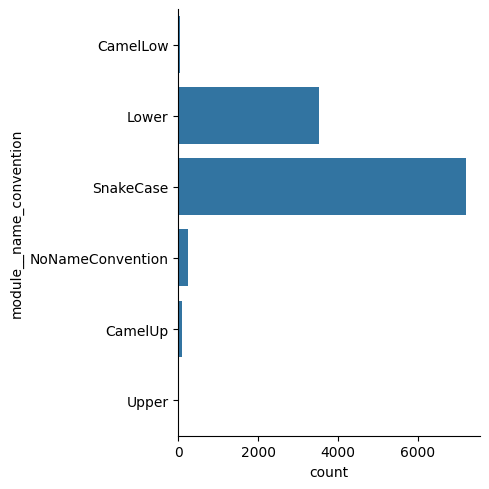

In [104]:
sns.catplot(full_table['module__name_convention'], kind="count")

In [105]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de SnakeCase en un 64.89% de los items.
La variable module__name_convention toma el valor de Lower en un 31.82% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 2.162% de los items.
La variable module__name_convention toma el valor de CamelUp en un 0.7116% de los items.
La variable module__name_convention toma el valor de CamelLow en un 0.2972% de los items.
La variable module__name_convention toma el valor de Upper en un 0.1171% de los items.


### Variable global_stmts_pct (8/14)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.227542.

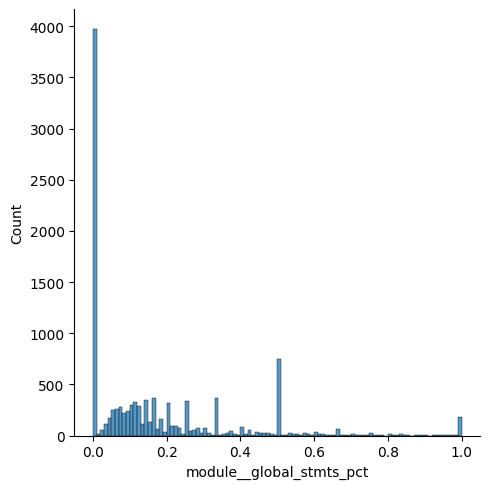

In [106]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

Hay muchos ficheros con 0. Hay que comprobar a que se puede deber. Seguramente por ser únicamente la definición de una clase.

In [107]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5305707856684723
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0585527628105783,3.3813176476643063]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.75 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.375 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 430 instancias tienen un valor para module__global_stmts_pct superior a 0.625 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 3.873% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.0 (Q3-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen u

In [108]:
X[X['module__global_stmts_pct'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3968,3968,3968.0,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,2450,2722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968
mean,NaN,NaN,0.0,0.100815,1.043347,1.327369,0.515995,0.383155,0.005337,2.150267,2.179918,0.221510,NaN
std,NaN,NaN,0.0,0.223766,2.765362,4.071511,0.475251,0.462004,0.061742,3.778996,2.878289,0.292719,NaN
min,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.0,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.500000,0.000000,NaN
75%,NaN,NaN,0.0,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.500000,0.500000,NaN


Comprobar un fichero que tenga 0 de todo

### Variable global_expressions (9/14)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.094516. La media es MUY baja, habría que revisarlo.

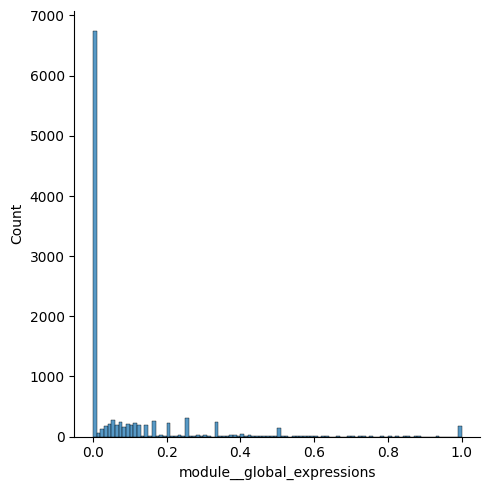

In [109]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

La mayoría es 0, relativamente lógico debido al uso de encapsulación.

In [110]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8280427091176004
Rango valores atípicos extremos (Tukey): [-0.27272726999999997,0.36363636]
Rango valores atípicos leves (Tukey): [-0.13636363499999998,0.22727272499999998]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0075170638961621905,3.8333597808983813]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.27272726999999997 (Q1-3*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.13636363499999998 (Q1-1.5*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
+1.5IQR: 1328 instancias tienen un valor para module__global_expressions superior a 0.22727272499999998 (Q3+1.5*IQR) para module__global_expressions. Representando un 11.96% del total de instancias.
+3.0IQR: 625 instancias tienen un valor para module__global_expressions superior a 0.36

In [111]:
X[X['module__global_expressions_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,4380,4380,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,2340,3156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3735
mean,NaN,NaN,0.171413,0.205433,1.255023,2.244749,0.392253,0.358903,0.006607,2.267607,2.021038,0.179037,NaN
std,NaN,NaN,0.195059,0.216714,4.140271,7.645216,0.449008,0.441154,0.058600,3.858896,2.649432,0.264706,NaN
min,NaN,NaN,0.000000,0.002247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.111111,0.125000,1.000000,0.000000,0.015407,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.250000,0.250000,1.000000,2.000000,1.000000,1.000000,0.000000,3.500000,3.631313,0.417769,NaN


In [112]:
X[X['module__global_expressions_pct'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,6722,6722,6722.000000,6722.0,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722.000000,6722
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,4864,6722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5433
mean,NaN,NaN,0.163221,0.0,0.985421,2.227462,0.396644,0.428219,0.005843,2.692137,2.029756,0.205144,NaN
std,NaN,NaN,0.224148,0.0,1.978330,4.750918,0.452583,0.459911,0.057198,4.193418,3.336790,0.278954,NaN
min,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.083333,0.0,1.000000,1.000000,0.026084,0.083333,0.000000,1.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.217391,0.0,1.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.285714,0.444444,NaN


### Variable class_defs_pct (10/14)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31924. 

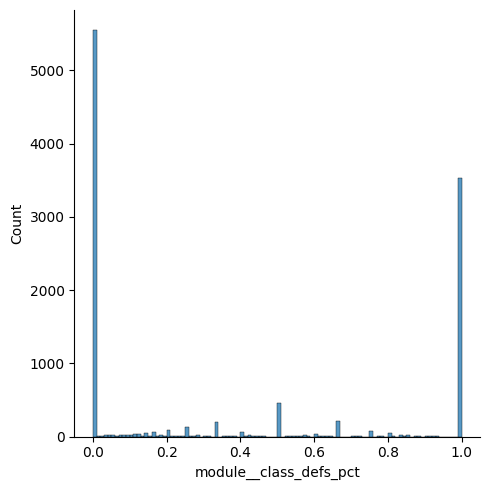

In [113]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [114]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.16723395979359856
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8353923776360164,3.928238205954306]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -3.0 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 4.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__class_def

In [115]:
X[X['module__class_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5556,5556,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3100,3658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4745
mean,NaN,NaN,0.098451,0.045734,2.181605,2.013859,0.789112,0.202843,0.008045,1.693518,4.046579,0.266278,NaN
std,NaN,NaN,0.126878,0.082106,3.988096,7.207556,0.309254,0.306530,0.055251,3.118421,3.290564,0.264750,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.262586,0.000000,NaN
50%,NaN,NaN,0.066667,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.405882,0.211484,NaN
75%,NaN,NaN,0.142857,0.071429,2.000000,1.000000,1.000000,0.500000,0.000000,2.902273,5.036532,0.500000,NaN


### Variable function_defs_pct (11/14)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.458978

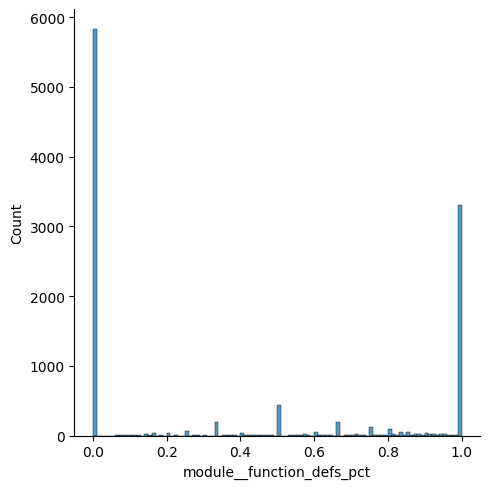

In [116]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [117]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.14527827881027666
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.9021189737005411,3.682041406349226]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

In [118]:
X[X['module__function_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5276,5276,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3549,3894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3851
mean,NaN,NaN,0.122974,0.048438,1.050796,4.701478,0.152793,0.843533,0.003674,5.312483,1.476458,0.225715,NaN
std,NaN,NaN,0.146553,0.100116,3.376034,8.104213,0.241240,0.244959,0.033443,4.477090,2.978567,0.294615,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.714286,0.000000,2.400000,0.000000,0.000000,NaN
50%,NaN,NaN,0.083333,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.173913,0.058824,1.000000,5.000000,0.267308,1.000000,0.000000,6.600000,2.500000,0.500000,NaN


In [119]:
X[X['module__function_defs_pct'] < 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,7793,7793,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,4853,5364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6844
mean,NaN,NaN,0.183848,0.090637,1.555370,1.449634,0.562596,0.146475,0.008753,1.219678,2.886714,0.190958,NaN
std,NaN,NaN,0.230975,0.186409,3.508979,6.159754,0.442307,0.276207,0.068769,2.750930,3.326354,0.254403,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.100000,0.000000,1.000000,0.000000,0.666667,0.000000,0.000000,0.000000,2.500000,0.000000,NaN
75%,NaN,NaN,0.260870,0.100000,2.000000,1.000000,1.000000,0.100000,0.000000,1.000000,4.333334,0.424242,NaN


### Variable enum_defs_pct (12/14)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 1.0. Su media es 0.003743.

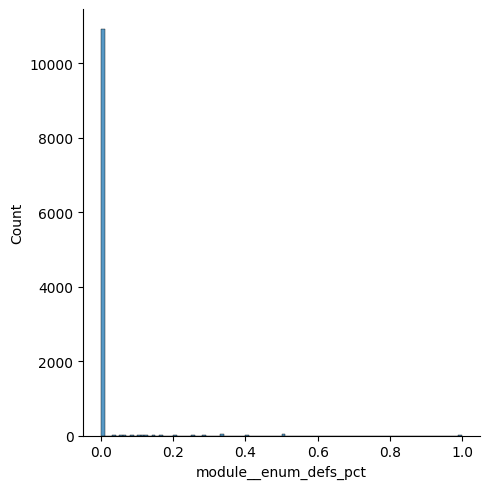

In [120]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [121]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9437356583703544
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 1.702% del total de instancias.
+3.0IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 1.702% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__en

In [122]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,189,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,125,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181
mean,NaN,NaN,0.144781,0.035442,2.608466,3.285714,0.396824,0.242264,0.360912,1.997986,2.949369,0.367436,NaN
std,NaN,NaN,0.130338,0.081328,3.336633,8.320243,0.282182,0.308795,0.261220,2.852680,2.188952,0.248884,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.045455,0.000000,1.000000,0.000000,0.116279,0.000000,0.166667,0.000000,1.642857,0.125000,NaN
50%,NaN,NaN,0.125000,0.000000,2.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.425926,NaN
75%,NaN,NaN,0.217391,0.045455,3.000000,3.000000,0.666667,0.500000,0.500000,3.500000,4.289473,0.574468,NaN


Solo se han usado enum en 189 de las cerca de 19mil ficheros. En los ficheros donde se usan enum, su media es de 0.36.

### Variable type_annotations_pct (13/14)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1.0. Su media es 0.142791. Esto nos dice que los tipos son poco usados en Python, como era de esperar.

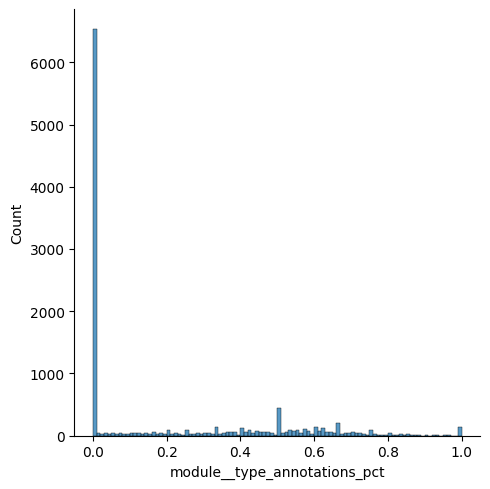

In [123]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [124]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5314487645707238
Rango valores atípicos extremos (Tukey): [-1.29729732,1.72972976]
Rango valores atípicos leves (Tukey): [-0.64864866,1.0810811]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10096970669995244,5.867820909166911]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -1.29729732 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.64864866 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 1.0810811 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 1.72972976 (Q3-3*IQR) para module__type_annotations_pct.

In [125]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,4587,4587,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,SnakeCase,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,2594,3124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4097
mean,NaN,NaN,0.095960,0.035047,1.540222,2.993242,0.569283,0.420525,0.010192,2.866785,2.956505,0.471585,NaN
std,NaN,NaN,0.117926,0.065002,2.747053,6.573725,0.431067,0.432550,0.065754,3.843601,2.818103,0.225405,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002128,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323529,NaN
50%,NaN,NaN,0.066667,0.000000,1.000000,1.000000,0.666667,0.333333,0.000000,2.000000,2.750000,0.500000,NaN
75%,NaN,NaN,0.142857,0.055556,2.000000,3.000000,1.000000,1.000000,0.000000,4.666666,4.375000,0.625000,NaN
